In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.special import beta, gamma
from scipy import stats as st
import seaborn as sns

In [2]:
# Global configurations
%matplotlib inline
plt.style.use("arviz-darkgrid")
sample_size = 1000

# Part 1

In [3]:
def simulate_chi2_distribution(sample_size, degrees_of_freedom):
    # Compute sum of squares of random samples
    squared_simulations = list()
    for _ in range(degrees_of_freedom):
        samples = np.random.standard_normal(size=sample_size) ** 2
        squared_simulations.append(samples)

    return np.sum(squared_simulations, axis=0)

def plot_chi2_distribution(chi2_samples, degrees_of_freedom):
    # Plot the chi2 samples
    plt.hist(chi2_samples, bins=20, density=True, label="Simulated Chi2")
    
    # Compute the true pdf
    max_x = np.ceil(np.max(chi2_samples))
    x = np.linspace(0, max_x, 200)
    k = degrees_of_freedom
    chi2_pdf = (x**(k/2-1)) * np.exp(-x/2) / (2**(k/2) * gamma(k/2))
    plt.plot(x, chi2_pdf, color="r", lw=2, label="True Chi2")

    plt.title(f"X ~ Chi2 with {k} degrees of freedom")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc=1)
    plt.show()

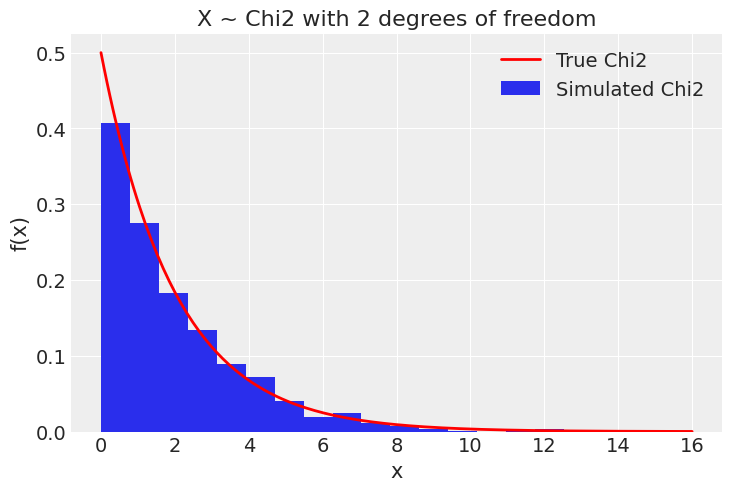

In [4]:
samples = simulate_chi2_distribution(sample_size=sample_size, degrees_of_freedom=2)
plot_chi2_distribution(samples, degrees_of_freedom=2)

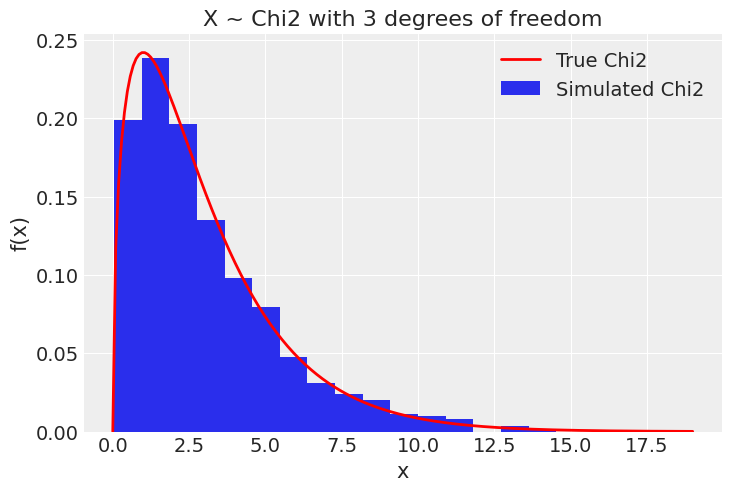

In [5]:
samples = simulate_chi2_distribution(sample_size=sample_size, degrees_of_freedom=3)
plot_chi2_distribution(samples, degrees_of_freedom=3)

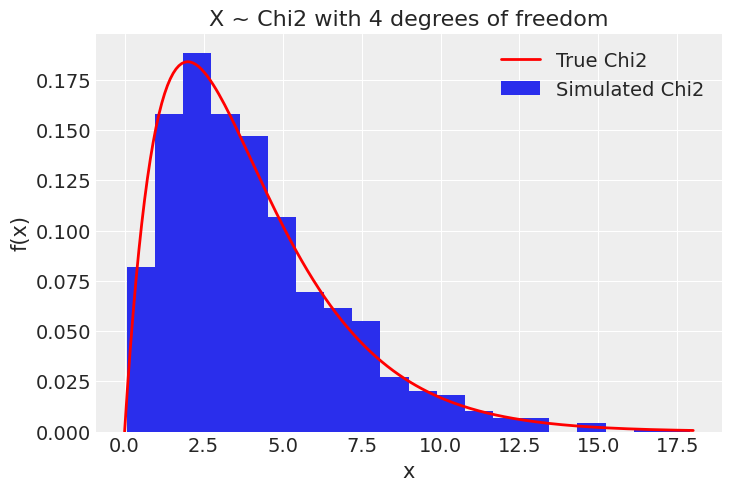

In [6]:
samples = simulate_chi2_distribution(sample_size=sample_size, degrees_of_freedom=4)
plot_chi2_distribution(samples, degrees_of_freedom=4)

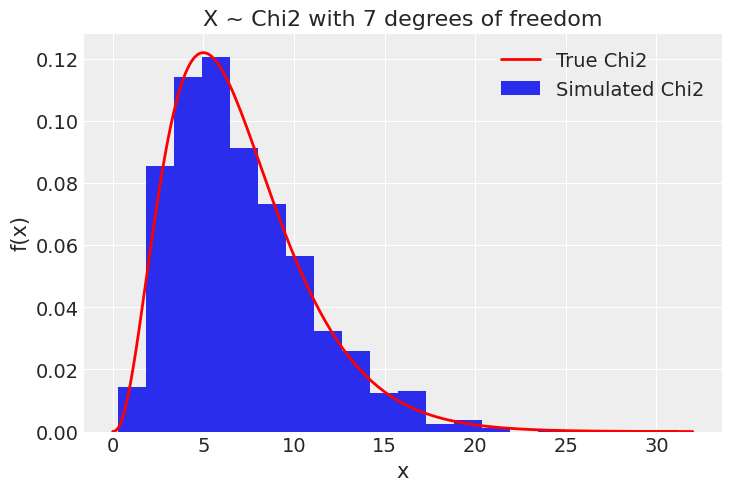

In [7]:
samples = simulate_chi2_distribution(sample_size=sample_size, degrees_of_freedom=7)
plot_chi2_distribution(samples, degrees_of_freedom=7)

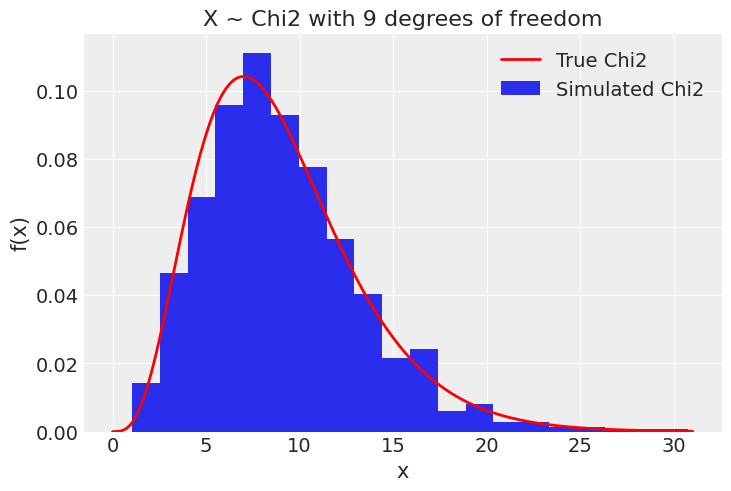

In [8]:
samples = simulate_chi2_distribution(sample_size=sample_size, degrees_of_freedom=9)
plot_chi2_distribution(samples, degrees_of_freedom=9)

# Part 2

In [9]:
def simulate_t_distribution(sample_size, degrees_of_freedom):
    # Compute t distribution samples
    k = degrees_of_freedom
    Z_samples = np.random.standard_normal(size=sample_size)
    chi2_samples = simulate_chi2_distribution(sample_size, degrees_of_freedom=k)
    t_samples = Z_samples / np.sqrt(chi2_samples/k)
    
    # Plot
    plt.hist(t_samples, bins=20, density=True, label="Simulated t dist")
    x = np.linspace(-8, 8, 200)
    z_pdf = np.exp(-(x**2)/2) / np.sqrt(2*np.pi)
    plt.plot(x, z_pdf, color="r", lw=2, label="Standard Normal pdf")
    
    plt.title(f"X ~ t dist with {k} degrees of freedom")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc=1)
    plt.xlim((-8, 8))
    plt.show()

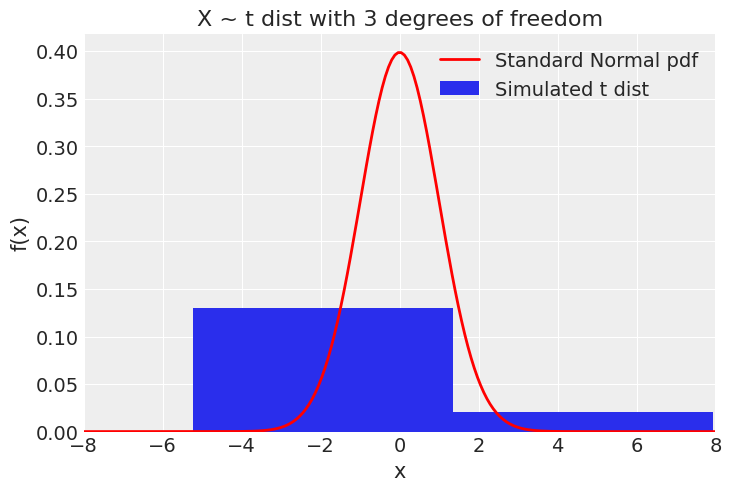

In [10]:
simulate_t_distribution(sample_size=10_000, degrees_of_freedom=3)

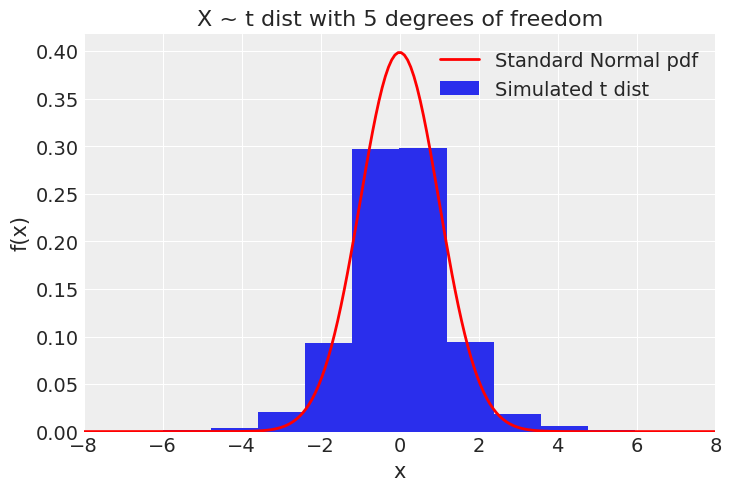

In [11]:
simulate_t_distribution(sample_size=10_000, degrees_of_freedom=5)

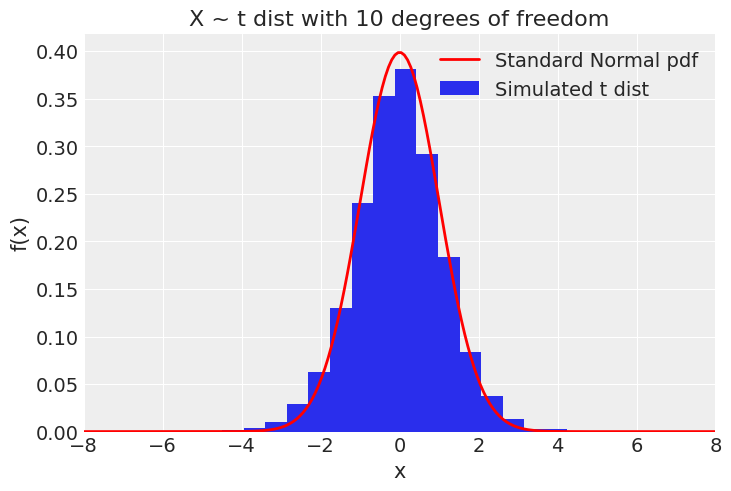

In [12]:
simulate_t_distribution(sample_size=10_000, degrees_of_freedom=10)

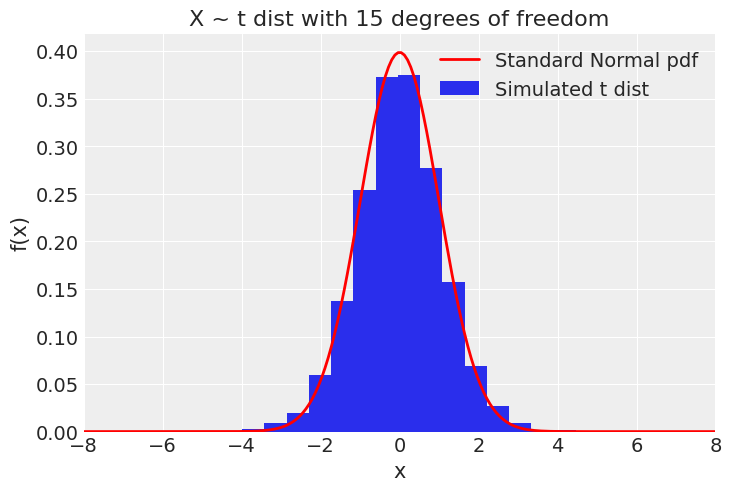

In [13]:
simulate_t_distribution(sample_size=10_000, degrees_of_freedom=15)

# Part 3

In [14]:
def simulate_f_distribution(sample_size, n1, n2):

    u1_samples = simulate_chi2_distribution(sample_size, degrees_of_freedom=n1)
    u2_samples = simulate_chi2_distribution(sample_size, degrees_of_freedom=n2)
    f_samples = (u1_samples/n1) / (u2_samples/n2)

    # Plot
    plt.hist(f_samples, bins=20, density=True, label="Simulated f dist")
    x = np.linspace(0, 10, 200)
    f_pdf = (n1**(n1/2)) * (n2**(n2/2)) * (x**((n1/2)-1)) / ((n1*x + n2)**((n1+n2)/2) * beta(n1/2, n2/2))
    plt.plot(x, f_pdf, color="r", lw=2, label="True f dist")

    plt.title(f"X ~ f(n1={n1}, n2={n2})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc=1)
    plt.show()

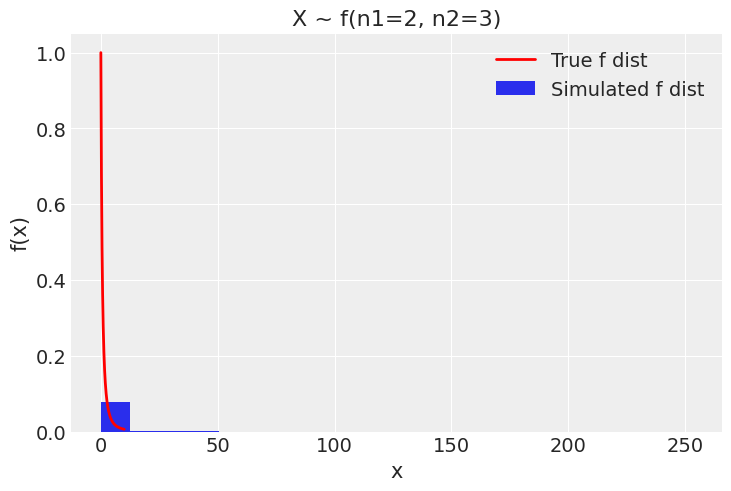

In [15]:
simulate_f_distribution(sample_size, n1=2, n2=3)

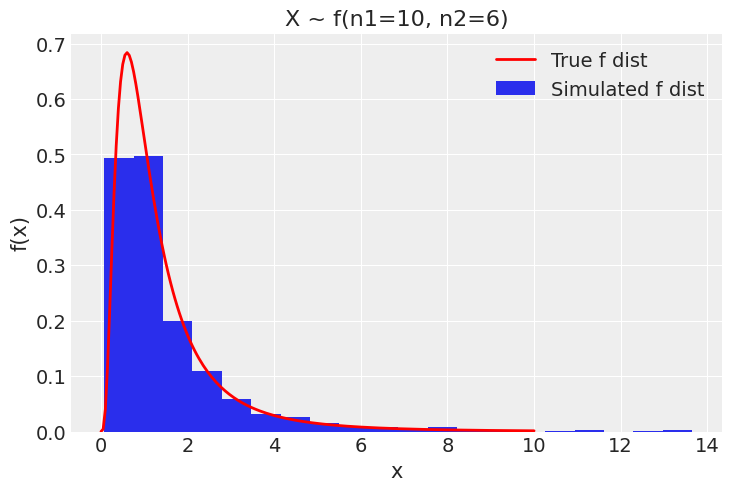

In [16]:
simulate_f_distribution(sample_size, n1=10, n2=6)

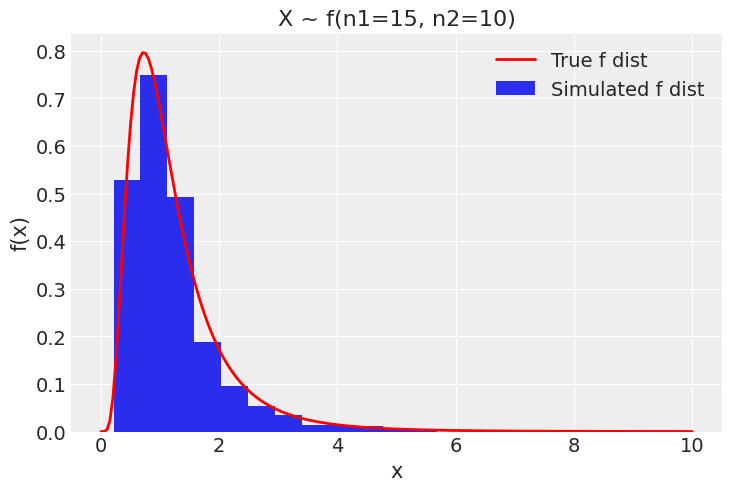

In [17]:
simulate_f_distribution(sample_size, n1=15, n2=10)

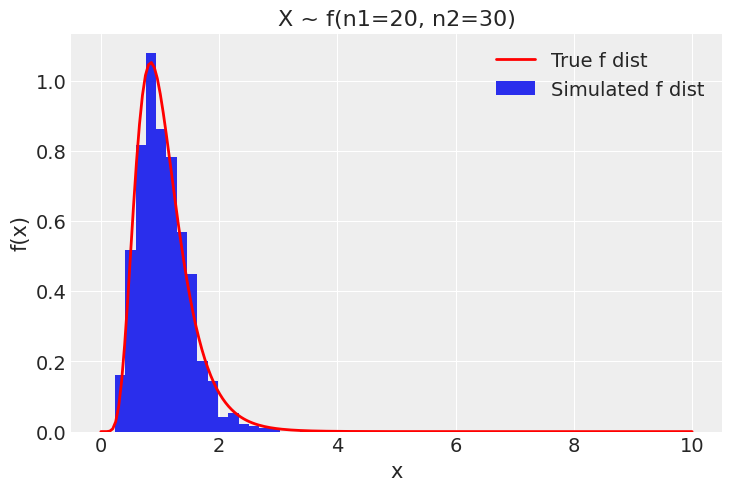

In [18]:
simulate_f_distribution(sample_size, n1=20, n2=30)

# Part 4

In [19]:
mean = [1, 2, 3]
mat = np.random.randn(3, 3) + 2
cov = mat @ mat.T
samples = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)
df = pd.DataFrame(samples, columns=["Variable 1", "Variable 2", "Variable 3"])

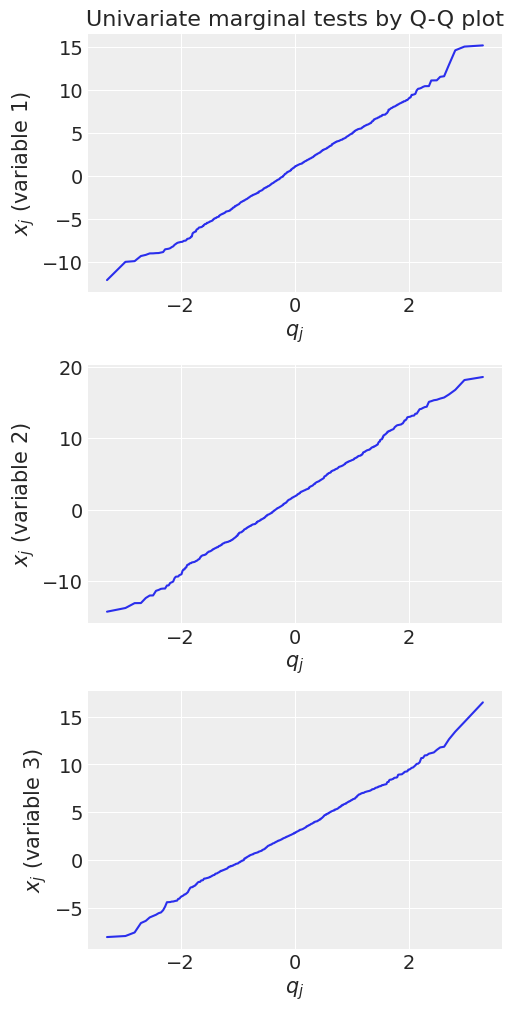

In [20]:
# Univariate marginal tests
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
for i in range(3):
    ordered_data = np.sort(samples[:, i])
    n = ordered_data.shape[0]
    q_js = list()
    for j in range(1, n+1):
        q_js.append(st.norm.ppf((j-(1/2))/n))

    axes[i].plot(q_js, ordered_data)
    axes[i].set_xlabel(r"$q_j$")
    axes[i].set_ylabel(f"$x_j$ (variable {i+1})")

axes[0].set_title("Univariate marginal tests by Q-Q plot")
plt.show()

## The Q-Q plots looks linear for all three variables. So, we can say that all three variables are normally distributed.

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


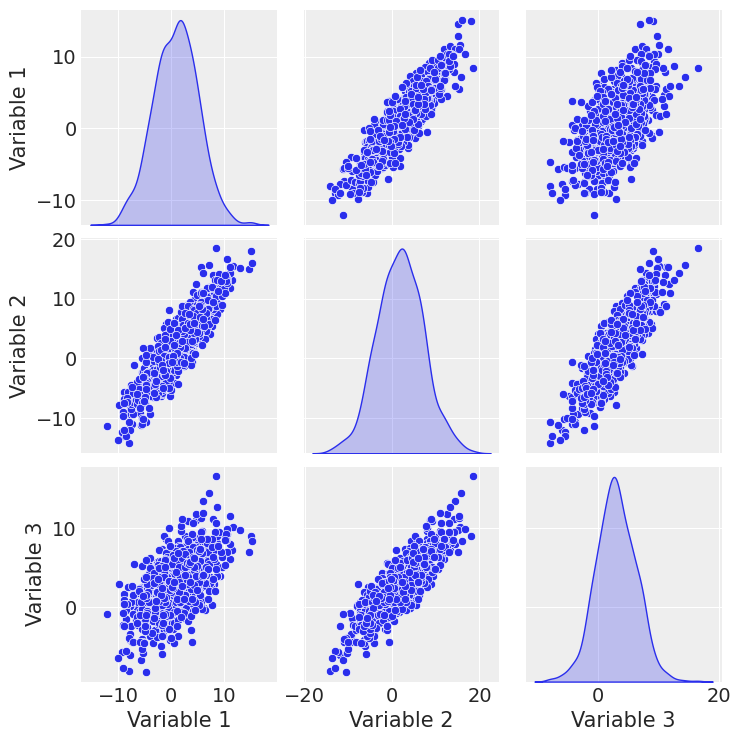

In [21]:
# Bivariate tests
sns.pairplot(df, diag_kind="kde")
plt.show()

## Yes, in bivariate analysis, the correlation is evident by ellipses and the variables seem to follow multivariate distribution.

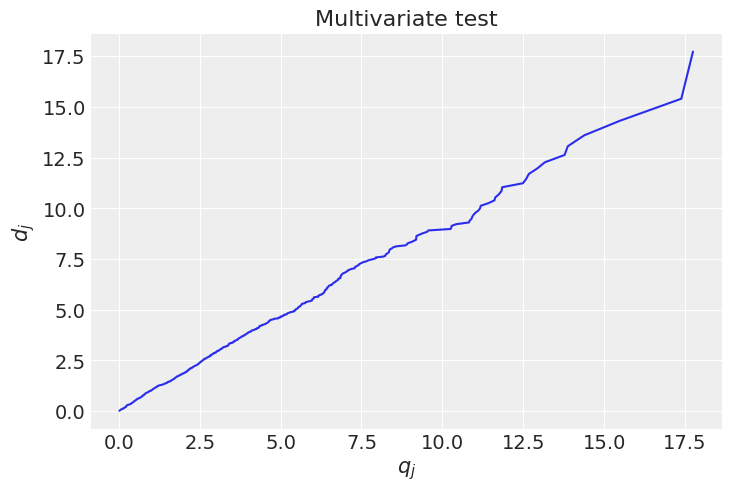

In [22]:
# Multivariate normality tests
mean = np.array(mean).reshape(-1, 1)
d_js = list()
for row in samples:
    row = row.reshape(-1, 1)
    dj = (row - mean).T @ np.linalg.inv(cov) @ (row - mean)
    d_js.append(np.squeeze(dj))
    
d_js = np.sort(np.array(d_js))
q_js = list()
for j in range(1, n+1):
    q_js.append(st.chi2.ppf(((j-(1/2))/n), 3))

plt.plot(d_js, q_js)
plt.xlabel(r"$q_j$")
plt.ylabel(f"$d_j$")
plt.title("Multivariate test")
plt.show()

## The above plot looks linear. So, the multivariate tests are also satisfied. Conclusion, the data comes from multivariate distribution.